Deneme 1: Başarı Oranı: %100.00
Deneme 2: Başarı Oranı: %0.00
Deneme 3: Başarı Oranı: %0.00
Deneme 4: Başarı Oranı: %0.00
Deneme 5: Başarı Oranı: %0.00
Deneme 6: Başarı Oranı: %100.00
Deneme 7: Başarı Oranı: %100.00
Deneme 8: Başarı Oranı: %100.00
Deneme 9: Başarı Oranı: %0.00
Deneme 10: Başarı Oranı: %0.00
Genel Başarı Oranı: %40.00


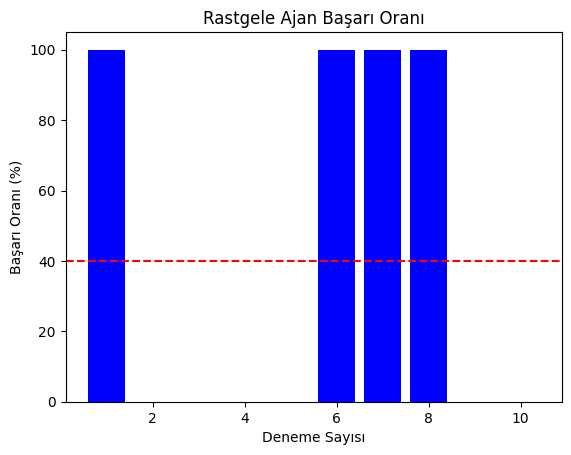

Çevresel Özellikler: {'Gözlenebilirlik': 'Kısmi Gözlenebilir', 'Deterministik': 'Stokastik', 'Epizodik': 'Epizodik', 'Dinamik': 'Statik', 'Kesikli': 'Kesikli', 'Ajan': 'Tekli-ajan'}


In [8]:
import random
import matplotlib.pyplot as plt

class ElektrikSupurgesiOrtam:
    def __init__(self):
        self.konumlar = {
            "A": random.choice(["Temiz", "Kirli"]),
            "B": random.choice(["Temiz", "Kirli"])
        }
        self.ajan_konum = random.choice(["A", "B"])
        self.eylemler = ["sola", "sağa", "süpür", "bekle"]

    def temiz_mi(self):
        return self.konumlar["A"] == "Temiz" and self.konumlar["B"] == "Temiz"

    def sola_git(self):
        self.ajan_konum = "A"

    def saga_git(self):
        self.ajan_konum = "B"

    def supur(self):
        self.konumlar[self.ajan_konum] = "Temiz"

    def eylemi_gerceklestir(self, eylem):
        if eylem == "sola":
            self.sola_git()
        elif eylem == "sağa":
            self.saga_git()
        elif eylem == "süpür":
            self.supur()

class RastgeleAjan:
    def __init__(self, ortam):
        self.env = ortam
        self.successful_cleanings = 0
        self.total_steps = 0

    def act(self):
        eylem = random.choice(self.env.eylemler)
        self.env.eylemi_gerceklestir(eylem)
        if self.env.konumlar[self.env.ajan_konum] == "Temiz":
            self.successful_cleanings += 1
        self.total_steps += 1

def simulate_rastgele_ajan(deneme_sayisi=10):
    basari_oranlari = []
    
    for deneme in range(deneme_sayisi):
        ortam = ElektrikSupurgesiOrtam()
        ajan_instance = RastgeleAjan(ortam)
        
        for _ in range(10):  # 10 adım
            ajan_instance.act()
        
        # Başarı oranını görevini yerine getirip getirmediğine göre hesaplıyoruz
        total_cleanings = (ajan_instance.successful_cleanings == 10)  # Tüm görevleri temizleme
        success_rate = total_cleanings * 100  # 0 veya 100
        basari_oranlari.append(success_rate)
        
        # Her denemeden sonra çıktı ver
        print(f"Deneme {deneme + 1}: Başarı Oranı: %{success_rate:.2f}")
    
    genel_basari_orani = sum(basari_oranlari) / deneme_sayisi
    print(f"Genel Başarı Oranı: %{genel_basari_orani:.2f}")
    
    # Görselleştirme
    plt.bar(range(1, deneme_sayisi + 1), basari_oranlari, color='blue')
    plt.xlabel('Deneme Sayısı')
    plt.ylabel('Başarı Oranı (%)')
    plt.title('Rastgele Ajan Başarı Oranı')
    plt.axhline(y=genel_basari_orani, color='red', linestyle='--')
    plt.show()

    # Çevresel Özellikler
    cevresel_ozellikler = {
        "Gözlenebilirlik": "Kısmi Gözlenebilir",
        "Deterministik": "Stokastik",
        "Epizodik": "Epizodik",
        "Dinamik": "Statik",
        "Kesikli": "Kesikli",
        "Ajan": "Tekli-ajan"
    }
    
    print("Çevresel Özellikler:", cevresel_ozellikler)

if __name__ == "__main__":
    simulate_rastgele_ajan()